# IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing the necessary datsets
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

## ANALYZING MATCHES DATASET

In [3]:
matches.head()  #To view the top 5 rows present

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#To find the number of rows and columns in it
matches.shape

(756, 18)

In [5]:
#To find overall details regarding the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#To find the number of null values present in each category
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
#Let's drop unnecessary columns(Which is of no use for prediction)
matches.drop(['umpire1','umpire2','umpire3'],axis='columns',inplace=True)

In [8]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [9]:
matches.columns   #City ,id,venue

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [10]:
matches.drop(['win_by_wickets','win_by_runs','player_of_match','venue','id'],axis="columns",inplace=True)

In [11]:
matches

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians
752,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians
753,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals
754,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings


In [12]:
matches['dl_applied'].value_counts() #These values will not have much impact on the prediction
                                     # Duckworth-Lewis occurs once in blue moon :)

0    737
1     19
Name: dl_applied, dtype: int64

In [13]:
matches.drop(['dl_applied'],axis="columns",inplace=True)

In [14]:
matches

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians
752,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians
753,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals
754,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings


In [15]:
# A game without winner also means nothing for our prediction
no_winner=matches[matches['winner'].isnull()]
no_winner

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner
300,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,NaN
545,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,NaN
570,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,NaN
744,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,NaN


In [16]:
#These data are of no use for us to predict so we can drop these data
matches['result'].replace('no result', np.nan, inplace=True)

In [17]:
matches.dropna(subset=['result'], inplace=True)   #So we removed those 4 rows from our dataset

In [18]:
matches[matches['winner'].isnull()]

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner


In [19]:
#Analyzing the columns in it one by one
#Season column
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [20]:
matches['Season'].dtype  #Object datatype ,we need to convert it into integer

dtype('O')

In [21]:
matches['Season'] = matches['Season'].str.slice(start=4).astype(int)
#Here the input is 'IPL-2017' so performing slicing operation to extract data from 4th index
#And converting it into int datatype

In [22]:
matches['Season'].unique()  #Converted all the value

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [23]:
matches['Season'].dtype  #Converted the datatype as well

dtype('int32')

In [24]:
#Next column City
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [25]:
#This column is not much important for prediction as well
matches.drop('city',axis="columns",inplace=True)

In [26]:
matches

,Season,date,team1,team2,toss_winner,toss_decision,result,winner
0,2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad
1,2017,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant
2,2017,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders
3,2017,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab
4,2017,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...
751,2019,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians
752,2019,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians
753,2019,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals
754,2019,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings


In [27]:
#For columns 
#Some team name are modified overtime so we need to replace those value as well
team_list=pd.read_csv('teams.csv')
team_list

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [28]:
print(matches['team1'].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     83
Kolkata Knight Riders           83
Delhi Daredevils                70
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [29]:
print(matches['team2'].value_counts())

Kolkata Knight Riders          95
Royal Challengers Bangalore    94
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               78
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  25
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64


In [30]:
print(matches['winner'].value_counts())

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


In [31]:
print(matches['toss_winner'].value_counts())

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    80
Delhi Daredevils               79
Rajasthan Royals               78
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


In [32]:
#So let's convert all the old team names with new one
#Let's start with Pune warriors ==>Latest name='Rising Pune Supergiant'
matches.replace(['Pune Warriors','Rising Pune Supergiants'],'Rising Pune Supergiant',inplace=True)

In [33]:
#Let's replace Deccan charger with SRH
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [34]:
#Let's replace Delhi Daredevils as Delhi Capitals
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [35]:
#Let's verify whether all column contains same number of labels
matches['team1'].nunique()

11

In [36]:
matches['team2'].nunique()

11

In [37]:
matches['winner'].nunique()

11

In [38]:
matches.head()

,Season,date,team1,team2,toss_winner,toss_decision,result,winner
0,2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad
1,2017,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant
2,2017,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders
3,2017,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab
4,2017,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore


# ANALYZING DELIVERIES DATASET

In [39]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:
deliveries.shape  #To find the number of rows and columns

(179078, 21)

In [41]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [42]:
deliveries['player_dismissed'].value_counts()

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
             ... 
S Randiv        1
R Ninan         1
B Sumanth       1
C Madan         1
S Singh         1
Name: player_dismissed, Length: 487, dtype: int64

In [43]:
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [44]:
deliveries['fielder'].value_counts()

MS Dhoni               159
KD Karthik             152
RV Uthappa             125
SK Raina               115
AB de Villiers         114
                      ... 
RJ Peterson              1
P Dogra (sub)            1
NLTC Perera (sub)        1
LA Pomersbach (sub)      1
S Warrier                1
Name: fielder, Length: 499, dtype: int64

The above three columns must have high amount of NaN values ,if not for every ball bowled,the batsmen needs to get dismissed. 

In [45]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

We are creating a new dataframe to store the batsman stats seperately

# BATSMAN STATS

In [46]:
batsman_stats = deliveries['batsman'].value_counts().rename('Deliveries Faced').reset_index()  #.reset_index() use to convert it into dataframe
batsman_stats.columns = ['Batsman', 'Deliveries_Faced']  #Naming the columns

In [47]:
batsman_stats.sort_values(by='Batsman',inplace=True)  #Sorting the dataframe based on Batsman column

In [48]:
batsman_stats

,Batsman,Deliveries_Faced
156,A Ashish Reddy,196
450,A Chandila,7
251,A Chopra,75
372,A Choudhary,20
467,A Dananjaya,5
...,...,...
158,YV Takawale,183
262,Yashpal Singh,67
452,Younis Khan,7
19,Yuvraj Singh,2207


In [49]:
group=deliveries.groupby(['batsman'])
value=group['inning'].nunique()
value

batsman
A Ashish Reddy    2
A Chandila        1
A Chopra          2
A Choudhary       2
A Dananjaya       1
                 ..
YV Takawale       2
Yashpal Singh     2
Younis Khan       1
Yuvraj Singh      3
Z Khan            2
Name: inning, Length: 516, dtype: int64

In [50]:
batsman_stats['Innings']=value.values

In [51]:
batsman_stats
#Thus the innings column is also extracted from the delivery dataset

,Batsman,Deliveries_Faced,Innings
156,A Ashish Reddy,196,2
450,A Chandila,7,1
251,A Chopra,75,2
372,A Choudhary,20,2
467,A Dananjaya,5,1
...,...,...,...
158,YV Takawale,183,2
262,Yashpal Singh,67,2
452,Younis Khan,7,1
19,Yuvraj Singh,2207,3


In [52]:
#To find the batsman run
#Group consists of batsman grouped together in those we will perform sum() operation along batsman_runs
value=group['batsman_runs'].sum()
value

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2765
Z Khan             117
Name: batsman_runs, Length: 516, dtype: int64

In [53]:
batsman_stats['Runs_Scored']=value.values  #We are assigning the value to the Run_Scored column

In [54]:
batsman_stats

,Batsman,Deliveries_Faced,Innings,Runs_Scored
156,A Ashish Reddy,196,2,280
450,A Chandila,7,1,4
251,A Chopra,75,2,53
372,A Choudhary,20,2,25
467,A Dananjaya,5,1,4
...,...,...,...,...
158,YV Takawale,183,2,192
262,Yashpal Singh,67,2,47
452,Younis Khan,7,1,3
19,Yuvraj Singh,2207,3,2765


In [55]:
#We needs to use Batsman as index for easy reference
batsman_stats.set_index('Batsman', inplace=True)

In [56]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored
Batsman,,,
A Ashish Reddy,196,2,280
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25
A Dananjaya,5,1,4
...,...,...,...
YV Takawale,183,2,192
Yashpal Singh,67,2,47
Younis Khan,7,1,3


In [57]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [58]:
#We need to add value in other columns such as 'bye_runs','legbye_runs' and 'noball_runs' in the batsman account itself.

In [59]:
bye_runs=group['bye_runs'].sum()

In [60]:
bye_runs

batsman
A Ashish Reddy    5
A Chandila        0
A Chopra          0
A Choudhary       0
A Dananjaya       0
                 ..
YV Takawale       0
Yashpal Singh     0
Younis Khan       0
Yuvraj Singh      2
Z Khan            3
Name: bye_runs, Length: 516, dtype: int64

In [61]:
legbye_runs=group['legbye_runs'].sum()

In [62]:
legbye_runs

batsman
A Ashish Reddy     0
A Chandila         0
A Chopra           1
A Choudhary        0
A Dananjaya        0
                  ..
YV Takawale        9
Yashpal Singh      0
Younis Khan        0
Yuvraj Singh      29
Z Khan             0
Name: legbye_runs, Length: 516, dtype: int64

In [63]:
noball_runs=group['noball_runs'].sum()

In [64]:
noball_runs

batsman
A Ashish Reddy    0
A Chandila        0
A Chopra          0
A Choudhary       0
A Dananjaya       0
                 ..
YV Takawale       1
Yashpal Singh     1
Younis Khan       0
Yuvraj Singh      7
Z Khan            1
Name: noball_runs, Length: 516, dtype: int64

In [65]:
Total_extras=noball_runs+legbye_runs+bye_runs
Total_extras

batsman
A Ashish Reddy     5
A Chandila         0
A Chopra           1
A Choudhary        0
A Dananjaya        0
                  ..
YV Takawale       10
Yashpal Singh      1
Younis Khan        0
Yuvraj Singh      38
Z Khan             4
Length: 516, dtype: int64

In [66]:
batsman_stats['Total_Extras']=Total_extras.values

In [67]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,Total_Extras
Batsman,,,,
A Ashish Reddy,196,2,280,5
A Chandila,7,1,4,0
A Chopra,75,2,53,1
A Choudhary,20,2,25,0
A Dananjaya,5,1,4,0
...,...,...,...,...
YV Takawale,183,2,192,10
Yashpal Singh,67,2,47,1
Younis Khan,7,1,3,0


In [68]:
#Now we need to add the columns Runs_Scored and Total_Extras
batsman_stats=batsman_stats.assign(Runs_Scored=batsman_stats['Runs_Scored']+batsman_stats['Total_Extras'])
#We are adding both the columns and assign it to Runs_scored

In [69]:
batsman_stats.drop('Total_Extras',axis='columns',inplace=True) #We are removing the Total_Extra column

In [70]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored
Batsman,,,
A Ashish Reddy,196,2,285
A Chandila,7,1,4
A Chopra,75,2,54
A Choudhary,20,2,25
A Dananjaya,5,1,4
...,...,...,...
YV Takawale,183,2,202
Yashpal Singh,67,2,48
Younis Khan,7,1,3


In [71]:
deliveries['total_runs'].unique()
#The common runs scored are 1,2,3,4,5,6 let's concentrate on those data alone

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [72]:
#To find the number of 2's scored 
batsman_stats['1_scores']=deliveries[deliveries['total_runs']==1].groupby('batsman')['total_runs'].sum()

In [73]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores
Batsman,,,,
A Ashish Reddy,196,2,285,87.0
A Chandila,7,1,4,4.0
A Chopra,75,2,54,26.0
A Choudhary,20,2,25,13.0
A Dananjaya,5,1,4,2.0
...,...,...,...,...
YV Takawale,183,2,202,50.0
Yashpal Singh,67,2,48,22.0
Younis Khan,7,1,3,3.0


In [74]:
#We need to fill the NaN values
batsman_stats['1_scores'].fillna(0,inplace=True)

In [75]:
#Similarly let's find the 2 , 3 , 4 and 6
#To find the number of 2's scored 
batsman_stats['2_scores']=deliveries[deliveries['total_runs']==2].groupby('batsman')['total_runs'].sum()
batsman_stats['2_scores'].fillna(0,inplace=True)

In [76]:
batsman_stats['3_scores']=deliveries[deliveries['total_runs']==3].groupby('batsman')['total_runs'].sum()
batsman_stats['3_scores'].fillna(0,inplace=True)

In [77]:
batsman_stats['4_scores']=deliveries[deliveries['total_runs']==4].groupby('batsman')['total_runs'].sum()
batsman_stats['4_scores'].fillna(0,inplace=True)

In [78]:
batsman_stats['5_scores']=deliveries[deliveries['total_runs']==5].groupby('batsman')['total_runs'].sum()
batsman_stats['5_scores'].fillna(0,inplace=True)

In [79]:
batsman_stats['6_scores']=deliveries[deliveries['total_runs']==1].groupby('batsman')['total_runs'].sum()
batsman_stats['6_scores'].fillna(0,inplace=True)

In [80]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores
Batsman,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
YV Takawale,183,2,202,50.0,26.0,0.0,108.0,5.0,50.0
Yashpal Singh,67,2,48,22.0,4.0,3.0,20.0,0.0,22.0
Younis Khan,7,1,3,3.0,0.0,0.0,0.0,0.0,3.0


In [81]:
#To compute dot balls
batsman_stats['dot_score']=deliveries[deliveries['total_runs']==0].groupby('batsman')['total_runs'].count()
batsman_stats['dot_score'].fillna(0,inplace=True)
#Note dot balls are counted whereas the other values are summed(Each value as weight in this case).

In [82]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score
Batsman,,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0,56.0
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0,3.0
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0,40.0
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0,4.0
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
YV Takawale,183,2,202,50.0,26.0,0.0,108.0,5.0,50.0,89.0
Yashpal Singh,67,2,48,22.0,4.0,3.0,20.0,0.0,22.0,37.0
Younis Khan,7,1,3,3.0,0.0,0.0,0.0,0.0,3.0,4.0


In [83]:
group['player_dismissed'].count()  #Group is already defined which is the deliveries dataset grouped on the basics of batsman

batsman
A Ashish Reddy     15
A Chandila          1
A Chopra            5
A Choudhary         2
A Dananjaya         0
                 ... 
YV Takawale         8
Yashpal Singh       4
Younis Khan         1
Yuvraj Singh      109
Z Khan             15
Name: player_dismissed, Length: 516, dtype: int64

In [84]:
#Count the dismissal 
batsman_stats['Dismissal_counts']=group['player_dismissed'].count()

In [85]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts
Batsman,,,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,183,2,202,50.0,26.0,0.0,108.0,5.0,50.0,89.0,8
Yashpal Singh,67,2,48,22.0,4.0,3.0,20.0,0.0,22.0,37.0,4
Younis Khan,7,1,3,3.0,0.0,0.0,0.0,0.0,3.0,4.0,1


In [86]:
#To decide whether a batsman is working upto mark depends on:
# 1==>Strike Rate (very important in T20 format)
# 2==>Batting average 

In [87]:
#To calulate Strike rate
batsman_stats['Strike_rate']=round(batsman_stats['Runs_Scored']/batsman_stats['Deliveries_Faced'],3)*100

In [88]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate
Batsman,,,,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15,145.4
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1,57.1
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5,72.0
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2,125.0
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,183,2,202,50.0,26.0,0.0,108.0,5.0,50.0,89.0,8,110.4
Yashpal Singh,67,2,48,22.0,4.0,3.0,20.0,0.0,22.0,37.0,4,71.6
Younis Khan,7,1,3,3.0,0.0,0.0,0.0,0.0,3.0,4.0,1,42.9


In [89]:
#To calculate the batting average
batsman_stats['Batting_average']=round(batsman_stats['Runs_Scored']/batsman_stats['Dismissal_counts'],3)

In [90]:
batsman_stats

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate,Batting_average
Batsman,,,,,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15,145.4,19.000
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1,57.1,4.000
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5,72.0,10.800
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2,125.0,12.500
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0,80.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,183,2,202,50.0,26.0,0.0,108.0,5.0,50.0,89.0,8,110.4,25.250
Yashpal Singh,67,2,48,22.0,4.0,3.0,20.0,0.0,22.0,37.0,4,71.6,12.000
Younis Khan,7,1,3,3.0,0.0,0.0,0.0,0.0,3.0,4.0,1,42.9,3.000


In [91]:
batsman_stats['Batting_average'].value_counts()
#We have 30 inf values 

inf       30
4.000     14
8.000     13
0.000     11
9.000     10
          ..
24.925     1
38.474     1
21.310     1
30.364     1
8.067      1
Name: Batting_average, Length: 326, dtype: int64

In [92]:
#Let's fill inf with NaN.
batsman_stats['Batting_average'].replace(np.inf,np.nan,inplace=True)

In [93]:
batsman_stats['Batting_average'].fillna(0,inplace=True)

In [94]:
batsman_stats.head()

,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate,Batting_average
Batsman,,,,,,,,,,,,,
A Ashish Reddy,196,2,285,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15,145.4,19.0
A Chandila,7,1,4,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1,57.1,4.0
A Chopra,75,2,54,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5,72.0,10.8
A Choudhary,20,2,25,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2,125.0,12.5
A Dananjaya,5,1,4,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0,80.0,0.0


We are creating seperate dataframe for bowler statistics

# BOWLING STATS

In [95]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [96]:
group_bowl=deliveries.groupby(['bowler'])

In [97]:
bowler_stats = deliveries['bowler'].value_counts().rename('Balls').reset_index()  #.reset_index() use to convert it into dataframe
bowler_stats.columns = ['Bowler', 'Balls']  #Naming the columns

In [98]:
bowler_stats.sort_values(by='Bowler',inplace=True)  #Sorting the dataframe based on Batsman column

In [99]:
bowler_stats.set_index('Bowler', inplace=True)

In [100]:
bowler_stats

,Balls
Bowler,
A Ashish Reddy,270
A Chandila,234
A Choudhary,108
A Dananjaya,25
A Flintoff,66
...,...
YA Abdulla,222
YK Pathan,1184
YS Chahal,1841


In [101]:
#To find the total overs bowled
bowler_stats['Overs']=bowler_stats['Balls'].floordiv(6)  #Performing floor division
bowler_stats

,Balls,Overs
Bowler,,
A Ashish Reddy,270,45
A Chandila,234,39
A Choudhary,108,18
A Dananjaya,25,4
A Flintoff,66,11
...,...,...
YA Abdulla,222,37
YK Pathan,1184,197
YS Chahal,1841,306


In [102]:
deliveries['dismissal_kind'].value_counts()
#The last three kind of wickets is quite unusual(The occurence of those kind of wickets is very rare)

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [103]:
Total_wickets = deliveries.query("dismissal_kind in ['caught', 'bowled', 'run out', 'lbw', 'stumped', 'caught and bowled']")
Total_wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,...,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


In [104]:
bowler_stats['Wickets']=Total_wickets.groupby(['bowler'])['ball'].count()

In [105]:
#Let's fill the Nan values
bowler_stats['Wickets'].fillna(0,inplace=True)
bowler_stats

,Balls,Overs,Wickets
Bowler,,,
A Ashish Reddy,270,45,19.0
A Chandila,234,39,11.0
A Choudhary,108,18,5.0
A Dananjaya,25,4,0.0
A Flintoff,66,11,2.0
...,...,...,...
YA Abdulla,222,37,15.0
YK Pathan,1184,197,46.0
YS Chahal,1841,306,102.0


In [106]:
deliveries[['batsman_runs','total_runs']]
#For bowler total_runs must be considered since all the extras need to be added to bowler side only 

,batsman_runs,total_runs
0,0,0
1,0,0
2,4,4
3,0,0
4,0,2
...,...,...
179073,1,1
179074,2,2
179075,1,1
179076,2,2


In [107]:
#Next we need to compute economy of the bowler
#For that we need to find Total runs given
bowler_stats['Total_runs']= deliveries.groupby('bowler')['total_runs'].sum()

In [108]:
bowler_stats

,Balls,Overs,Wickets,Total_runs
Bowler,,,,
A Ashish Reddy,270,45,19.0,400
A Chandila,234,39,11.0,245
A Choudhary,108,18,5.0,144
A Dananjaya,25,4,0.0,48
A Flintoff,66,11,2.0,106
...,...,...,...,...
YA Abdulla,222,37,15.0,311
YK Pathan,1184,197,46.0,1443
YS Chahal,1841,306,102.0,2416


In [109]:
#To find the economy
bowler_stats['Economy']=round(bowler_stats['Total_runs']/bowler_stats['Overs'],3)

In [110]:
bowler_stats

,Balls,Overs,Wickets,Total_runs,Economy
Bowler,,,,,
A Ashish Reddy,270,45,19.0,400,8.889
A Chandila,234,39,11.0,245,6.282
A Choudhary,108,18,5.0,144,8.000
A Dananjaya,25,4,0.0,48,12.000
A Flintoff,66,11,2.0,106,9.636
...,...,...,...,...,...
YA Abdulla,222,37,15.0,311,8.405
YK Pathan,1184,197,46.0,1443,7.325
YS Chahal,1841,306,102.0,2416,7.895


In [111]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [112]:
data_grouped = deliveries.groupby(['batsman','non_striker','bowler','match_id']).size().reset_index(name='count')
data_grouped.head(10)
#Here count will be having the count of rows with similar data

,batsman,non_striker,bowler,match_id,count
0,A Ashish Reddy,A Mishra,AB Dinda,402,4
1,A Ashish Reddy,A Mishra,AD Mathews,402,8
2,A Ashish Reddy,A Mishra,MR Marsh,402,3
3,A Ashish Reddy,AA Jhunjhunwala,P Kumar,359,1
4,A Ashish Reddy,AA Jhunjhunwala,PP Chawla,359,2
5,A Ashish Reddy,CL White,R Vinay Kumar,432,2
6,A Ashish Reddy,CL White,RP Singh,432,1
7,A Ashish Reddy,DB Ravi Teja,AB Dinda,384,3
8,A Ashish Reddy,DJG Sammy,CH Morris,414,4
9,A Ashish Reddy,DJG Sammy,DJ Bravo,414,3


In [113]:
data_count = data_grouped.groupby(['batsman']).size().reset_index(name='matches')
data_count.set_index('batsman', inplace=True)
data_count

,matches
batsman,
A Ashish Reddy,60
A Chandila,5
A Chopra,17
A Choudhary,6
A Dananjaya,2
...,...
YV Takawale,40
Yashpal Singh,15
Younis Khan,2


# MERGING THE DATAFRAMES

In [114]:
#Let's join both the dataframe of batsman and bowler stats
#Concat function cannot be used here so we are using merge from pandas
final_stats=pd.merge(data_count, batsman_stats, left_index=True, right_index=True,how='outer')
final_stats=pd.merge(final_stats,bowler_stats, left_index=True, right_index=True,how='outer')
#We need rows from both the dataframe so left and right index both must be True
#Here we are performing outer join

In [115]:
final_stats  #The reduced version(with all necessary details) from deliveries dataframe

,matches,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate,Batting_average,Balls,Overs,Wickets,Total_runs,Economy
A Ashish Reddy,60.0,196.0,2.0,285.0,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15.0,145.4,19.000,270.0,45.0,19.0,400.0,8.889
A Chandila,5.0,7.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,57.1,4.000,234.0,39.0,11.0,245.0,6.282
A Chopra,17.0,75.0,2.0,54.0,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5.0,72.0,10.800,NaN,NaN,NaN,NaN,NaN
A Choudhary,6.0,20.0,2.0,25.0,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2.0,125.0,12.500,108.0,18.0,5.0,144.0,8.000
A Dananjaya,2.0,5.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,80.0,0.000,25.0,4.0,0.0,48.0,12.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,40.0,183.0,2.0,202.0,50.0,26.0,0.0,108.0,5.0,50.0,89.0,8.0,110.4,25.250,NaN,NaN,NaN,NaN,NaN
Yashpal Singh,15.0,67.0,2.0,48.0,22.0,4.0,3.0,20.0,0.0,22.0,37.0,4.0,71.6,12.000,NaN,NaN,NaN,NaN,NaN
Younis Khan,2.0,7.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,42.9,3.000,NaN,NaN,NaN,NaN,NaN
Yuvraj Singh,572.0,2207.0,3.0,2803.0,836.0,266.0,12.0,872.0,15.0,836.0,864.0,109.0,127.0,25.716,882.0,147.0,39.0,1092.0,7.429


In [116]:
final_stats.isnull().sum()

matches              43
Deliveries_Faced     43
Innings              43
Runs_Scored          43
1_scores             43
2_scores             43
3_scores             43
4_scores             43
5_scores             43
6_scores             43
dot_score            43
Dismissal_counts     43
Strike_rate          43
Batting_average      43
Balls               154
Overs               154
Wickets             154
Total_runs          154
Economy             155
dtype: int64

In [117]:
#Let's fill all the null values with zero
final_stats.fillna(0,inplace=True)

In [118]:
final_stats.head()

,matches,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate,Batting_average,Balls,Overs,Wickets,Total_runs,Economy
A Ashish Reddy,60.0,196.0,2.0,285.0,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15.0,145.4,19.0,270.0,45.0,19.0,400.0,8.889
A Chandila,5.0,7.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,57.1,4.0,234.0,39.0,11.0,245.0,6.282
A Chopra,17.0,75.0,2.0,54.0,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5.0,72.0,10.8,0.0,0.0,0.0,0.0,0.000
A Choudhary,6.0,20.0,2.0,25.0,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2.0,125.0,12.5,108.0,18.0,5.0,144.0,8.000
A Dananjaya,2.0,5.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,80.0,0.0,25.0,4.0,0.0,48.0,12.000


In [119]:
final_stats=final_stats.reset_index().rename(columns={'index':'Batsman'})

In [120]:
final_stats

,Batsman,matches,Deliveries_Faced,Innings,Runs_Scored,1_scores,2_scores,3_scores,4_scores,5_scores,6_scores,dot_score,Dismissal_counts,Strike_rate,Batting_average,Balls,Overs,Wickets,Total_runs,Economy
0,A Ashish Reddy,60.0,196.0,2.0,285.0,87.0,40.0,3.0,68.0,0.0,87.0,56.0,15.0,145.4,19.000,270.0,45.0,19.0,400.0,8.889
1,A Chandila,5.0,7.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,57.1,4.000,234.0,39.0,11.0,245.0,6.282
2,A Chopra,17.0,75.0,2.0,54.0,26.0,4.0,0.0,28.0,0.0,26.0,40.0,5.0,72.0,10.800,0.0,0.0,0.0,0.0,0.000
3,A Choudhary,6.0,20.0,2.0,25.0,13.0,2.0,0.0,4.0,0.0,13.0,4.0,2.0,125.0,12.500,108.0,18.0,5.0,144.0,8.000
4,A Dananjaya,2.0,5.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,80.0,0.000,25.0,4.0,0.0,48.0,12.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,YV Takawale,40.0,183.0,2.0,202.0,50.0,26.0,0.0,108.0,5.0,50.0,89.0,8.0,110.4,25.250,0.0,0.0,0.0,0.0,0.000
555,Yashpal Singh,15.0,67.0,2.0,48.0,22.0,4.0,3.0,20.0,0.0,22.0,37.0,4.0,71.6,12.000,0.0,0.0,0.0,0.0,0.000
556,Younis Khan,2.0,7.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,42.9,3.000,0.0,0.0,0.0,0.0,0.000
557,Yuvraj Singh,572.0,2207.0,3.0,2803.0,836.0,266.0,12.0,872.0,15.0,836.0,864.0,109.0,127.0,25.716,882.0,147.0,39.0,1092.0,7.429


# VISUALIZING THE RELATIONSHIPS 

In [121]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relationship between Runs Scored and Strike Rate')

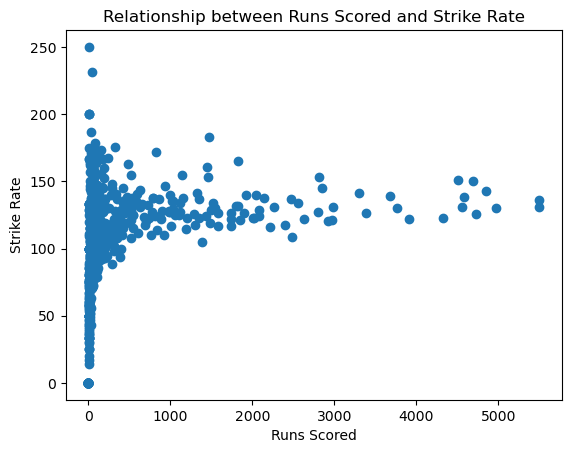

In [122]:
#To understand relation between 
plt.scatter(final_stats['Runs_Scored'],final_stats['Strike_rate'])

# Add labels and title
plt.xlabel('Runs Scored')
plt.ylabel('Strike Rate')
plt.title('Relationship between Runs Scored and Strike Rate')

In [123]:
# Just comparing the Top_10 values so that the data can be easily understandable```

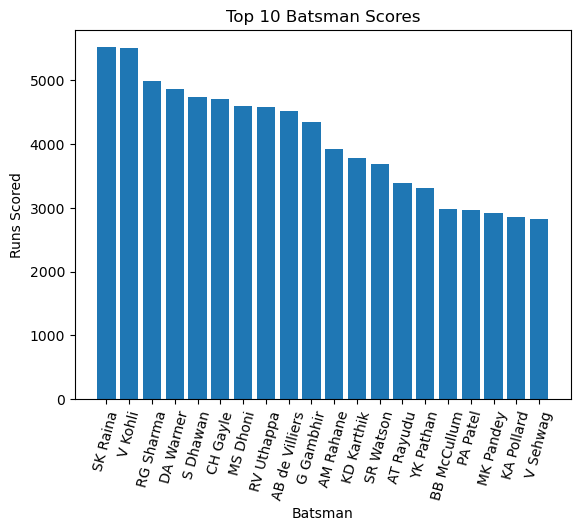

In [124]:
# Sort the dataframe by the 'Runs_Scored' column
Top_10 = final_stats.sort_values(by='Runs_Scored', ascending=False)

# Select the top 20 rows
Top_10 = Top_10.head(20)

# Create a bar chart of the runs scored by each batsman
plt.bar(Top_10['Batsman'],Top_10['Runs_Scored'])

# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.title('Top 10 Batsman Scores')
# Tilt the x-axis labels
plt.xticks(rotation=75)

# Show the plot
plt.show()

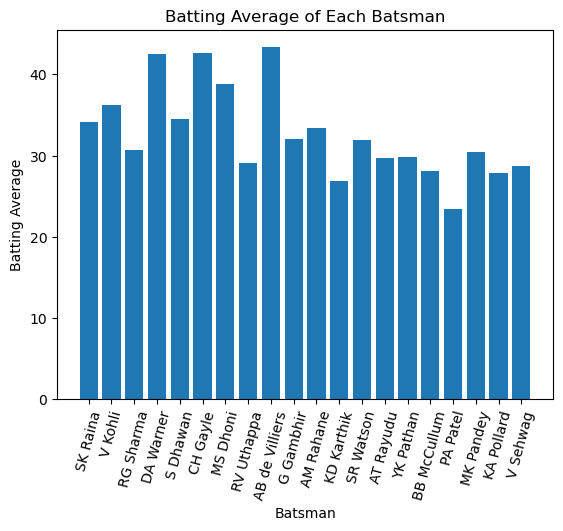

In [125]:
# Create a bar chart of the batting average of each batsman
plt.bar(Top_10['Batsman'],Top_10['Batting_average'])
# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Batting Average')
plt.title('Batting Average of Each Batsman')
# Tilt the x-axis labels
plt.xticks(rotation=75)
# Show the plot
plt.show()

In [126]:
dismissals = Top_10.groupby('Dismissal_counts').agg({'Batsman': 'first', 'Runs_Scored': 'sum'})
dismissals

,Batsman,Runs_Scored
Dismissal_counts,,
96.0,MK Pandey,2918.0
98.0,V Sehwag,2814.0
102.0,KA Pollard,2848.0
104.0,AB de Villiers,4504.0
106.0,BB McCullum,2979.0
110.0,CH Gayle,4695.0
111.0,YK Pathan,3306.0
114.0,DA Warner,8230.0
115.0,SR Watson,3674.0


In [127]:
dismissals=dismissals.reset_index().rename({'index' : 'Counts'})
dismissals.head()

,Dismissal_counts,Batsman,Runs_Scored
0,96.0,MK Pandey,2918.0
1,98.0,V Sehwag,2814.0
2,102.0,KA Pollard,2848.0
3,104.0,AB de Villiers,4504.0
4,106.0,BB McCullum,2979.0


In [128]:
dismissals.set_index('Batsman',inplace=True)

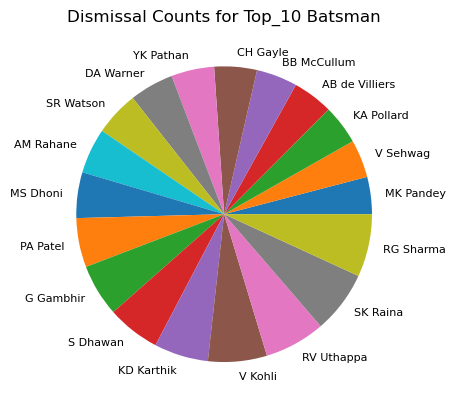

In [129]:
# Create a pie chart of the dismissal counts for each batsman
plt.pie(dismissals['Dismissal_counts'], labels=dismissals.index,textprops={'fontsize':8})

# Add title
plt.title('Dismissal Counts for Top_10 Batsman')

# Show the plot
plt.show()

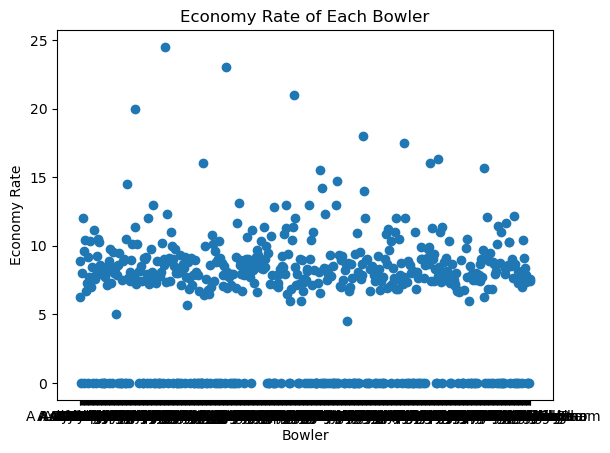

In [130]:
# Create a scatter plot of the economy rate of each bowler
plt.scatter(final_stats['Batsman'], final_stats['Economy'])

# Add labels and title
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.title('Economy Rate of Each Bowler')

# Show the plot
plt.show()

# MODIFICATION TO THE DATASET

In [131]:
# Modification to build my prediction model
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [132]:
Innings = deliveries.groupby(['match_id','inning','batting_team']).sum()['total_runs'].reset_index()
Innings = Innings.query('inning == 1')  #We are calculating for 1 st innings alone
Innings.head()
#After this we will be having the rspective match_is's !st innings score

C:\Users\dsaiy\AppData\Local\Temp\ipykernel_13152\3455206957.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Innings = deliveries.groupby(['match_id','inning','batting_team']).sum()['total_runs'].reset_index()


,match_id,inning,batting_team,total_runs
0,1,1,Sunrisers Hyderabad,207
2,2,1,Mumbai Indians,184
4,3,1,Gujarat Lions,183
6,4,1,Rising Pune Supergiant,163
8,5,1,Royal Challengers Bangalore,157


In [133]:
#To find the Target score 
Innings['Target_score']=Innings['total_runs']+1

In [134]:
# Add a new column to the dataframe
Innings=Innings.assign(Second_batting=deliveries['bowling_team'])

# Rename the new column
Innings=Innings.rename(columns={'batting_team':'First_batting','match_id':'id'})

In [135]:
Innings

,id,inning,First_batting,total_runs,Target_score,Second_batting
0,1,1,Sunrisers Hyderabad,207,208,Royal Challengers Bangalore
2,2,1,Mumbai Indians,184,185,Royal Challengers Bangalore
4,3,1,Gujarat Lions,183,184,Royal Challengers Bangalore
6,4,1,Rising Pune Supergiant,163,164,Royal Challengers Bangalore
8,5,1,Royal Challengers Bangalore,157,158,Royal Challengers Bangalore
...,...,...,...,...,...,...
1518,11347,1,Kolkata Knight Riders,143,144,Mumbai Indians
1520,11412,1,Chennai Super Kings,136,137,Mumbai Indians
1522,11413,1,Sunrisers Hyderabad,171,172,Mumbai Indians
1524,11414,1,Delhi Capitals,155,156,Mumbai Indians


In [136]:
#Merge this into deliveries dataframe
matches=matches.merge(Innings[['id','First_batting','Second_batting','Target_score']],on='id')

In [137]:
matches.drop(['team1','team2'], axis='columns', inplace=True)

In [138]:
matches

,id,Season,city,date,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,First_batting,Second_batting,Target_score
0,1,IPL-2017,Hyderabad,05-04-2017,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,208
1,2,IPL-2017,Pune,06-04-2017,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Mumbai Indians,Royal Challengers Bangalore,185
2,3,IPL-2017,Rajkot,07-04-2017,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Gujarat Lions,Royal Challengers Bangalore,184
3,4,IPL-2017,Indore,08-04-2017,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Rising Pune Supergiant,Royal Challengers Bangalore,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Royal Challengers Bangalore,Royal Challengers Bangalore,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,Kolkata Knight Riders,Mumbai Indians,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,Chennai Super Kings,Mumbai Indians,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,Sunrisers Hyderabad,Mumbai Indians,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,Delhi Capitals,Mumbai Indians,156


In [139]:
#Replace old_names with New_names
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
matches.replace(['Pune Warriors','Rising Pune Supergiants'],'Rising Pune Supergiant',inplace=True)

In [140]:
matches['First_batting'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [141]:
matches.drop(['dl_applied'],axis="columns",inplace=True)
matches.drop(['win_by_wickets','win_by_runs','player_of_match','venue','Season'],axis="columns",inplace=True)
matches.drop(['umpire1','umpire2','umpire3','city','date'],axis='columns',inplace=True)

In [142]:
matches.drop(['result','toss_winner','toss_decision'],axis='columns',inplace=True)

In [143]:
matches

,id,winner,First_batting,Second_batting,Target_score
0,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208
1,2,Rising Pune Supergiant,Mumbai Indians,Royal Challengers Bangalore,185
2,3,Kolkata Knight Riders,Gujarat Lions,Royal Challengers Bangalore,184
3,4,Kings XI Punjab,Rising Pune Supergiant,Royal Challengers Bangalore,164
4,5,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,158
...,...,...,...,...,...
751,11347,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,144
752,11412,Mumbai Indians,Chennai Super Kings,Mumbai Indians,137
753,11413,Delhi Capitals,Sunrisers Hyderabad,Mumbai Indians,172
754,11414,Chennai Super Kings,Delhi Capitals,Mumbai Indians,156


In [144]:
#Replace old_names with New_names
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace(['Pune Warriors','Rising Pune Supergiants'],'Rising Pune Supergiant',inplace=True)

In [145]:
# Renaming the column match_id 
deliveries=deliveries.rename(columns={'match_id':'id'})

In [146]:
#combining both the datset based on the id column
Second_Innings=matches.merge(deliveries,on='id')
Second_Innings.drop(['batting_team','bowling_team'],axis="columns",inplace=True)

In [147]:
Second_Innings

,id,winner,First_batting,Second_batting,Target_score,inning,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,1,1,1,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,1,1,2,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,1,1,3,DA Warner,S Dhawan,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,1,1,4,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,1,1,5,DA Warner,S Dhawan,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Mumbai Indians,Mumbai Indians,Mumbai Indians,153,2,20,2,RA Jadeja,SR Watson,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,Mumbai Indians,Mumbai Indians,Mumbai Indians,153,2,20,3,SR Watson,RA Jadeja,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,Mumbai Indians,Mumbai Indians,Mumbai Indians,153,2,20,4,SR Watson,RA Jadeja,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,Mumbai Indians,Mumbai Indians,Mumbai Indians,153,2,20,5,SN Thakur,RA Jadeja,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [148]:
#In order to predict the exact prediction we need go ball by ball approach for that we will be
#now comcentrating on Second_batting team
Second_Innings = Second_Innings.query('inning == 2')

In [149]:
Second_Innings.head()

,id,winner,First_batting,Second_batting,Target_score,inning,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,1,CH Gayle,Mandeep Singh,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,2,Mandeep Singh,CH Gayle,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,3,Mandeep Singh,CH Gayle,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,4,Mandeep Singh,CH Gayle,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,5,Mandeep Singh,CH Gayle,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [150]:
Second_Innings['Current_runs_Scored'] = Second_Innings.groupby('id')['total_runs'].transform('cumsum')
#Cumsum is cummulative summing up 

C:\Users\dsaiy\AppData\Local\Temp\ipykernel_13152\1144479107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Second_Innings['Current_runs_Scored'] = Second_Innings.groupby('id')['total_runs'].transform('cumsum')


In [151]:
Second_Innings.head(10)
#Now Curren run scored will contain the score taken by 2nd batting team

,id,winner,First_batting,Second_batting,Target_score,inning,over,ball,batsman,non_striker,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Current_runs_Scored
125,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,1,CH Gayle,Mandeep Singh,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,2,Mandeep Singh,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,3,Mandeep Singh,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,4,Mandeep Singh,CH Gayle,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,5,Mandeep Singh,CH Gayle,...,0,0,0,4,0,4,NaN,NaN,NaN,7
130,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,6,Mandeep Singh,CH Gayle,...,0,0,0,4,0,4,NaN,NaN,NaN,11
131,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,2,1,CH Gayle,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,11
132,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,2,2,CH Gayle,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,11
133,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,2,3,CH Gayle,Mandeep Singh,...,0,0,0,1,0,1,NaN,NaN,NaN,12
134,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,2,4,Mandeep Singh,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,12


In [ ]:
#To find the remaining runs to be scored
Second_Innings['runs_left'] = (Second_Innings['Target_score'] - Second_Innings['Current_runs_Scored']).clip(lower=0) #clip is used to set low limit to 0

In [ ]:
#To find the remaining ball left
Second_Innings['balls_left'] = (120 - Second_Innings['over'] * 6 - Second_Innings['ball']+7).clip(lower=0)

In [154]:
Second_Innings.head()

,id,winner,First_batting,Second_batting,Target_score,inning,over,ball,batsman,non_striker,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Current_runs_Scored,runs_left,balls_left
125,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,1,CH Gayle,Mandeep Singh,...,0,1,0,1,NaN,NaN,NaN,1,207,120
126,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,2,Mandeep Singh,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,1,207,119
127,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,3,Mandeep Singh,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,1,207,118
128,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,4,Mandeep Singh,CH Gayle,...,0,2,0,2,NaN,NaN,NaN,3,205,117
129,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,5,Mandeep Singh,CH Gayle,...,0,4,0,4,NaN,NaN,NaN,7,201,116


In [ ]:
Second_Innings['CRR'] =Second_Innings['Current_runs_Scored']*6/(120-Second_Innings['balls_left'])

In [ ]:
Second_Innings['RRR']= np.where(Second_Innings['balls_left']>0, Second_Innings['runs_left']*6/Second_Innings['balls_left'], 0)

In [ ]:
#To keep track of whether Second or first batting team wins
Second_Innings['Outcome'] = (Second_Innings['Second_batting'] == Second_Innings['winner']).astype(int)

In [158]:
Second_Innings.head()

,id,winner,First_batting,Second_batting,Target_score,inning,over,ball,batsman,non_striker,...,total_runs,player_dismissed,dismissal_kind,fielder,Current_runs_Scored,runs_left,balls_left,CRR,RRR,Outcome
125,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,1,CH Gayle,Mandeep Singh,...,1,NaN,NaN,NaN,1,207,120,inf,10.350000,0
126,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,2,Mandeep Singh,CH Gayle,...,0,NaN,NaN,NaN,1,207,119,6.0,10.436975,0
127,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,3,Mandeep Singh,CH Gayle,...,0,NaN,NaN,NaN,1,207,118,3.0,10.525424,0
128,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,4,Mandeep Singh,CH Gayle,...,2,NaN,NaN,NaN,3,205,117,6.0,10.512821,0
129,1,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,208,2,1,5,Mandeep Singh,CH Gayle,...,4,NaN,NaN,NaN,7,201,116,10.5,10.396552,0


In [159]:
Final=Second_Innings[['First_batting','Second_batting','Target_score','runs_left','balls_left','CRR','RRR','Outcome']]

In [160]:
Final=Final.replace([np.inf,-np.inf],0) #Replacing infinite values with 0
Final.fillna(0,inplace=True)

In [161]:
Final

,First_batting,Second_batting,Target_score,runs_left,balls_left,CRR,RRR,Outcome
125,Sunrisers Hyderabad,Royal Challengers Bangalore,208,207,120,0.000000,10.350000,0
126,Sunrisers Hyderabad,Royal Challengers Bangalore,208,207,119,6.000000,10.436975,0
127,Sunrisers Hyderabad,Royal Challengers Bangalore,208,207,118,3.000000,10.525424,0
128,Sunrisers Hyderabad,Royal Challengers Bangalore,208,205,117,6.000000,10.512821,0
129,Sunrisers Hyderabad,Royal Challengers Bangalore,208,201,116,10.500000,10.396552,0
...,...,...,...,...,...,...,...,...
179073,Mumbai Indians,Mumbai Indians,153,1,5,7.930435,1.200000,1
179074,Mumbai Indians,Mumbai Indians,153,0,4,7.965517,0.000000,1
179075,Mumbai Indians,Mumbai Indians,153,0,3,7.948718,0.000000,1
179076,Mumbai Indians,Mumbai Indians,153,0,2,7.983051,0.000000,1


In [162]:
#We need to perform ordinal encoding
#So that categorical data are converted.Here we are using ordinal encoding approach
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
transformer=OrdinalEncoder()
Final_encoded=transformer.fit_transform(Final)

In [163]:
#Converting it into a datframe
Final_encoded=pd.DataFrame(Final_encoded)

In [164]:
Final_encoded

,0,1,2,3,4,5,6,7
0,10.0,6.0,121.0,207.0,120.0,0.0,5516.0,0.0
1,10.0,6.0,121.0,207.0,119.0,1293.0,5580.0,0.0
2,10.0,6.0,121.0,207.0,118.0,81.0,5642.0,0.0
3,10.0,6.0,121.0,205.0,117.0,1293.0,5627.0,0.0
4,10.0,6.0,121.0,201.0,116.0,4535.0,5552.0,0.0
...,...,...,...,...,...,...,...,...
86235,6.0,4.0,66.0,1.0,5.0,2693.0,194.0,1.0
86236,6.0,4.0,66.0,0.0,4.0,2721.0,0.0,1.0
86237,6.0,4.0,66.0,0.0,3.0,2708.0,0.0,1.0
86238,6.0,4.0,66.0,0.0,2.0,2742.0,0.0,1.0


# IMPORTING ALL NECESSARY MODELS TO FIND THE BEST FIT

In [165]:
#importing the models and the pipline
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [166]:
models={'LinearRegression':LinearRegression(),'Lasso':Lasso(),'ElasticNet':ElasticNet(),'RandomforestRegression':RandomForestRegressor(),'SVR':SVR()}

In [167]:
def model_score(Final_encoded,X_train,X_test,y_train,y_test):
    score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_predict=model.predict(X_test)
        accuracy=r2_score(y_test,y_predict)
        score[name]=accuracy
    return score   

# TRAIN AND TEST DATA SEPERATION

In [169]:
from sklearn.model_selection import train_test_split
X=Final_encoded.iloc[:,:-1]    #independent ==>All columns except the last one
y=Final_encoded.iloc[:,-1]     #Dependent ==> Only the last column
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
accuracy_score=model_score(Final_encoded,X_train,X_test,y_train,y_test)
# Using this we found that Random Forest Regression is best fit with accuracy score upto 98%

In [170]:
print(X.shape)
print(y.shape)

(86240, 7)
(86240,)


In [171]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict=rfr.predict(X_test)
y_predict

array([0.  , 0.98, 0.  , ..., 0.  , 0.  , 0.  ])

In [172]:
#The resulting dataframe will have the same number of rows as X_test and an additional column with the predicted values.
new=pd.DataFrame(X_test)
new[7]=y_predict

In [173]:
new

,0,1,2,3,4,5,6,7
43353,0.0,2.0,104.0,56.0,40.0,4276.0,4093.0,0.00
22702,3.0,4.0,77.0,69.0,45.0,2451.0,4676.0,0.98
80903,9.0,4.0,78.0,71.0,57.0,3443.0,3416.0,0.00
68439,1.0,7.0,100.0,159.0,98.0,2478.0,5068.0,0.00
56291,10.0,0.0,71.0,66.0,50.0,2660.0,3742.0,0.00
...,...,...,...,...,...,...,...,...
82914,9.0,4.0,93.0,58.0,40.0,3581.0,4312.0,1.00
25252,7.0,4.0,44.0,50.0,69.0,3854.0,1297.0,0.00
21283,10.0,4.0,85.0,43.0,26.0,2915.0,5207.0,0.00
65772,1.0,6.0,14.0,42.0,68.0,1705.0,978.0,0.00


In [174]:
Orig_data=transformer.inverse_transform(new) #Converting it back into categorical value

In [175]:
Orig_data

array([['Chennai Super Kings', 'Kings XI Punjab', 191, ..., 10.125, 8.4,
        0],
       ['Kings XI Punjab', 'Mumbai Indians', 164, ..., 7.6, 9.2, 0],
       ['Royal Challengers Bangalore', 'Mumbai Indians', 165, ...,
        8.952380952380953, 7.473684210526316, 0],
       ...,
       ['Sunrisers Hyderabad', 'Mumbai Indians', 172, ...,
        8.23404255319149, 9.923076923076923, 0],
       ['Delhi Capitals', 'Royal Challengers Bangalore', 99, ...,
        6.576923076923077, 3.7058823529411766, 0],
       ['Rising Pune Supergiant', 'Gujarat Lions', 183, ...,
        7.909090909090909, 12.5625, 0]], dtype=object)

In [179]:
pd.DataFrame(Orig_data)

,0,1,2,3,4,5,6,7
0,Chennai Super Kings,Kings XI Punjab,191,56,40,10.125,8.4,0
1,Kings XI Punjab,Mumbai Indians,164,69,45,7.6,9.2,0
2,Royal Challengers Bangalore,Mumbai Indians,165,71,57,8.952381,7.473684,0
3,Delhi Capitals,Sunrisers Hyderabad,187,159,98,7.636364,9.734694,0
4,Sunrisers Hyderabad,Delhi Capitals,158,66,50,7.885714,7.92,0
...,...,...,...,...,...,...,...,...
25867,Royal Challengers Bangalore,Mumbai Indians,180,58,40,9.15,8.7,1
25868,Rajasthan Royals,Mumbai Indians,131,50,69,9.529412,4.347826,0
25869,Sunrisers Hyderabad,Mumbai Indians,172,43,26,8.234043,9.923077,0
25870,Delhi Capitals,Royal Challengers Bangalore,99,42,68,6.576923,3.705882,0


### So here is how we decode the ouput 

### The last column (7) is the outcome(Predicted one)

###  If it is 0===>First Batting wins (0th column===>indicates the winning team name)

### Tf it is 1===>Second Batting wins (1st column===>indicates the winning team name)

In [185]:
# We are cross verifying for the first 0th index of Orig_data
result = Final.loc[(Final['First_batting'] == 'Chennai Super Kings') & (Final['Second_batting'] =='Kings XI Punjab')]

In [191]:
print(result['Outcome'])

83846    0
83847    0
83848    0
83849    0
83850    0
        ..
95794    0
95795    0
95796    0
95797    0
95798    0
Name: Outcome, Length: 689, dtype: int32


# Thus the model predicted the outcome correctly ,we verified it as well.